In [2]:
# Step 1: Import libraries
import pandas as pd
from sklearn.datasets import load_iris

# Step 2: Load dataset
iris = load_iris()

# Step 3: Convert to pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Step 4: Add target labels
df['species'] = iris.target

# Step 5: Replace numbers with names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Step 6: Show first few rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# 📄 Show basic structure and data types
print("INFO:")
print(df.info())

# 📊 Show statistical summary (mean, std, min, max, etc.)
print("\nSUMMARY STATISTICS:")
print(df.describe())

# ❓ Check for missing values
print("\nMISSING VALUES:")
print(df.isnull().sum())


INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

SUMMARY STATISTICS:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400

In [4]:
# Step 1: X contains all columns except the target (species)
X = df.drop('species', axis=1)

# Step 2: y contains only the target (species)
y = df['species']

# Step 3: Show the shape (rows, columns)
print("✅ Features shape (X):", X.shape)
print("✅ Target shape (y):", y.shape)

# Optional: See the first few rows of X and y
print("\n🔍 Features (X):")
print(X.head())

print("\n🎯 Target (y):")
print(y.head())


✅ Features shape (X): (150, 4)
✅ Target shape (y): (150,)

🔍 Features (X):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

🎯 Target (y):
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


In [5]:
# Step 1: Import the scaler
from sklearn.preprocessing import StandardScaler

# Step 2: Create a scaler object
scaler = StandardScaler()

# Step 3: Fit and transform X
X_scaled = scaler.fit_transform(X)

# Step 4: Show first 5 rows of scaled data
print("🔧 Scaled Feature Values:")
print(X_scaled[:5])


🔧 Scaled Feature Values:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [6]:
# Step 1: Import the function to split data
from sklearn.model_selection import train_test_split

# Step 2: Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Show the sizes
print("📚 Training data size (X_train):", X_train.shape)
print("🧪 Testing data size (X_test):", X_test.shape)
print("🎯 Training labels size (y_train):", y_train.shape)
print("🎯 Testing labels size (y_test):", y_test.shape)


📚 Training data size (X_train): (120, 4)
🧪 Testing data size (X_test): (30, 4)
🎯 Training labels size (y_train): (120,)
🎯 Testing labels size (y_test): (30,)


In [7]:
# Step 1: Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Step 2: Create the model
lr_model = LogisticRegression()

# Step 3: Train the model
lr_model.fit(X_train, y_train)

# Step 4: Predict on test data
y_pred_lr = lr_model.predict(X_test)

print("✅ Logistic Regression model trained!")


✅ Logistic Regression model trained!


In [8]:
# Step 1: Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Step 2: Create the model with 3 neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)

# Step 3: Train the model
knn_model.fit(X_train, y_train)

# Step 4: Predict on test data
y_pred_knn = knn_model.predict(X_test)

print("✅ KNN model trained!")


✅ KNN model trained!


In [9]:
# Step 1: Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Step 2: Create the model
dt_model = DecisionTreeClassifier(max_depth=3)  # You can change max_depth later

# Step 3: Train the model
dt_model.fit(X_train, y_train)

# Step 4: Predict on test data
y_pred_dt = dt_model.predict(X_test)

print("✅ Decision Tree model trained!")


✅ Decision Tree model trained!


📊 Logistic Regression - Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



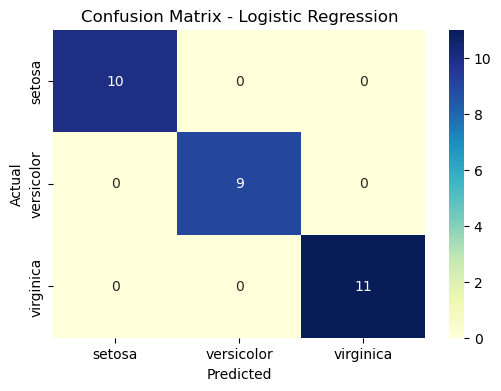

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression Evaluation
print("📊 Logistic Regression - Classification Report:\n")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, cmap="YlGnBu", fmt="d", xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


📊 KNN - Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



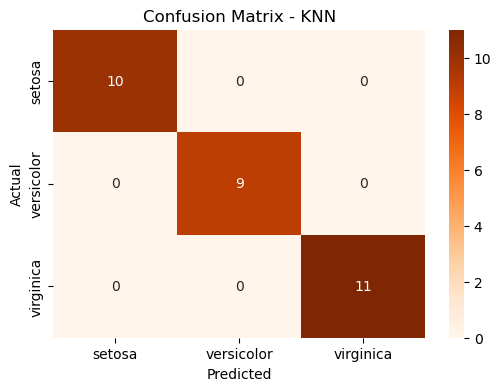

In [11]:
print("📊 KNN - Classification Report:\n")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, cmap="Oranges", fmt="d", xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


📊 Decision Tree - Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



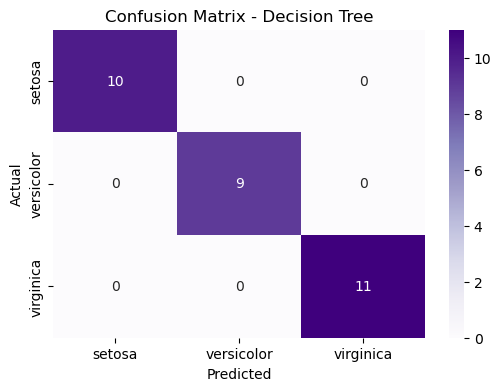

In [12]:
print("📊 Decision Tree - Classification Report:\n")
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, cmap="Purples", fmt="d", xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\Documents\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


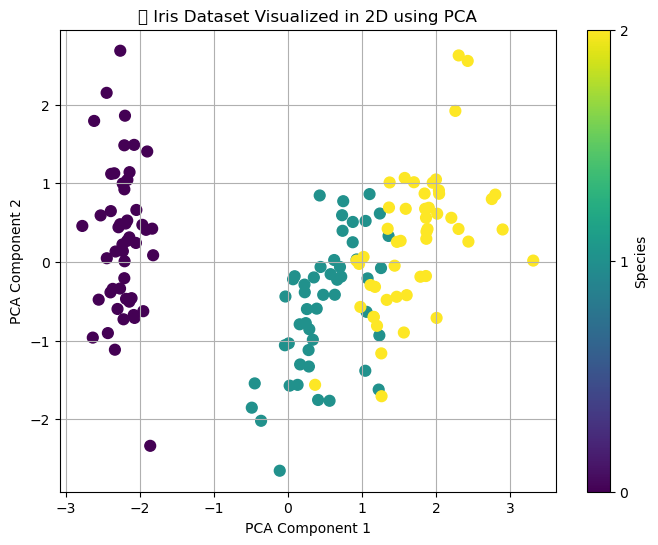

In [13]:
from sklearn.decomposition import PCA

# Step 1: Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 2: Plot the data in 2D
plt.figure(figsize=(8,6))
species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
colors = ['red', 'green', 'blue']

# Convert species to numbers for plotting
target_numbers = y.map(species_map)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target_numbers, cmap='viridis', s=60)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("🌸 Iris Dataset Visualized in 2D using PCA")
plt.colorbar(ticks=[0, 1, 2], label='Species')
plt.grid(True)
plt.show()
